# ScanPy - Github Issue 
 https://github.com/scverse/scanpy-tutorials/issues/28

E:\Hawkes\CudaTest\.venv\Lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
E:\Hawkes\CudaTest\.venv\Lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 5959380 stored elements and shape (4226, 33538)>
  Coords	Values
  (0, 33508)	5.0
  (0, 33505)	8.0
  (0, 33504)	2.0
  (0, 33503)	8.0
  (0, 33502)	12.0
  (0, 33501)	10.0
  (0, 33499)	16.0
  (0, 33498)	8.0
  (0, 33497)	8.0
  (0, 33496)	11.0
  (0, 33494)	3.0
  (0, 33474)	1.0
  (0, 33376)	1.0
  (0, 33360)	1.0
  (0, 33254)	1.0
  (0, 33209)	1.0
  (0, 33157)	1.0
  (0, 33131)	1.0
  (0, 33098)	1.0
  (0, 33097)	1.0
  (0, 33078)	1.0
  (0, 32987)	2.0
  (0, 32910)	1.0
  (0, 32844)	1.0
  (0, 32808)	1.0
  :	:
  (4225, 472)	1.0
  (4225, 458)	1.0
  (4225, 449)	1.0
  (4225, 443)	2.0
  (4225, 439)	2.0
  (4225, 421)	1.0
  (4225, 412)	2.0
  (4225, 411)	1.0
  (4225, 410)	1.0
  (4225, 407)	1.0
  (4225, 396)	1.0
  (4225, 259)	1.0
  (4225, 226)	2.0
  (4225, 220)	1.0
  (4225, 219)	3.0
  (4225, 214)	1.0
  (4225, 201)	2.0
  (4225, 190)	2.0
  (4225, 172)	1.0
  (4225, 161)	1.0
  (4225, 152)	1.0
  (4225, 93)	1.0
  (4225, 86)	1.0
  (4225, 70)	1.0
  (4225, 

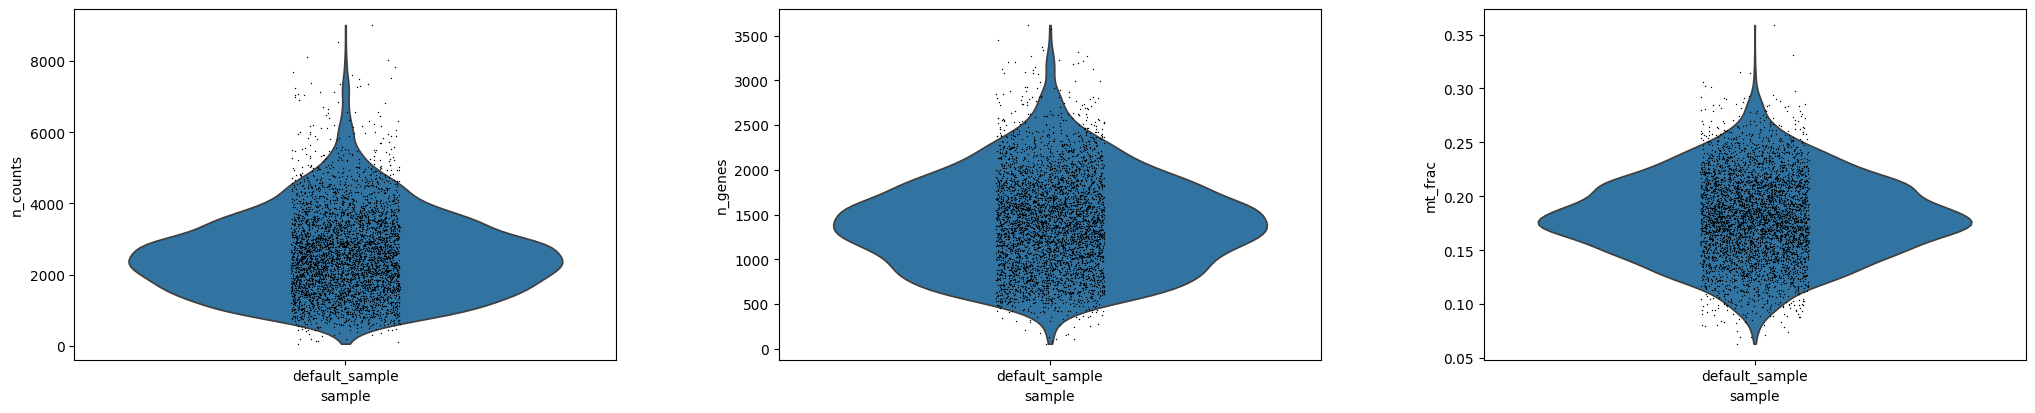

Number of cells after filter: 2910


In [1]:
import scanpy as sc
import numpy as np
from anndata import AnnData

# Read single-cell data
adata = sc.read_10x_h5('./data/filtered_feature_bc_matrix.h5')

# Debug variable names
var = adata.var_names

# Ensure variable names are unique
adata.var_names_make_unique()

# Debug variable names after making them unique
var = adata.var_names

# Print the data matrix
print(adata.X)

# Check and handle the 'sample' column
if 'sample' in adata.obs.columns:
    print(adata.obs['sample'].value_counts())
else:
    print("Warning: 'sample' column not found in adata.obs")
    adata.obs['sample'] = 'default_sample'
    print(adata.obs['sample'].value_counts())

# Print the number of cells before filtering
print(f'Number of cells before filter: {adata.n_obs}')

# Quality control - Calculate QC metrics
adata.obs['n_counts'] = adata.X.sum(1)  # Total UMI counts per cell
adata.obs['log_counts'] = np.log(adata.obs['n_counts'])  # Log-transformed UMI counts
adata.obs['n_genes'] = (adata.X > 0).sum(1)  # Number of detected genes per cell

# Calculate mitochondrial gene fraction
mt_gene_mask = [gene.startswith('MT-') for gene in adata.var_names]  # Mask for mitochondrial genes
mt_counts = adata.X[:, mt_gene_mask].sum(1)  # Total mitochondrial gene counts per cell
total_counts = adata.obs['n_counts']
adata.obs['mt_frac'] = mt_counts.A.flatten() / total_counts  # Fraction of mitochondrial gene counts

# Visualize QC metrics
sc.pl.violin(adata, ['n_counts', 'n_genes', 'mt_frac'], groupby='sample')

# Filter cells based on QC metrics
adata = adata[adata.obs['n_counts'] < 20000, :]  # Filter out cells with high UMI counts
adata = adata[adata.obs['mt_frac'] < 0.2, :]  # Filter out cells with high mitochondrial gene fraction

print(f'Number of cells after filter: {adata.n_obs}')